In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import math
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from pathlib import Path
BASE_DIR = Path().absolute().parent.parent
DIR = BASE_DIR/'scripts_res'/'Algorithms'
DIR

WindowsPath('d:/OneDrive/Current/2_Codes/BO_Related/ASBO/ASBO/scripts_res/Algorithms')

In [3]:
def cleaning(df2,n_init,iter,opt):
    cumulative_max_df = pd.DataFrame()
    for index, row in df2.iterrows():
        initial_max = row[list(range(n_init))].max()
        cumulative_max_list = [initial_max]
        current_max = initial_max
        for iter_value in row[list(range(n_init,n_init+iter,1))]:
            if iter_value > current_max:
                current_max = iter_value  
            cumulative_max_list.append(current_max)  
        cumulative_max_df = pd.concat([cumulative_max_df, pd.DataFrame([cumulative_max_list])], ignore_index=True)
    cumulative_max_df.columns = [f'iter_{i+1}' for i in range(iter+1)]
    non_inf_counts =  cumulative_max_df.count()
    
    std = cumulative_max_df.std()
    mean = cumulative_max_df.mean(axis=0)
    regret_mean = np.log10(opt - mean)
    upper = np.log10(opt - mean + 1.96*std/np.sqrt(non_inf_counts)) #cumulative_max_df.shape[0]
    lower = np.log10(opt - mean - 1.96*std/np.sqrt(non_inf_counts)) #cumulative_max_df.shape[0]

    return cumulative_max_df,regret_mean,lower,upper

In [4]:
import scipy.io 
from scipy import stats

fmin_store_cell = scipy.io.loadmat(DIR/'Case2_fmin.mat')['fmin_store_cell']

data = []
for row in fmin_store_cell:
    for item in row:
        data.append(item.flatten())  
df = pd.DataFrame(data)
df.describe()    

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-230.660611,-231.157384,-232.058301,-233.258176,-234.291002,-235.815620,-236.036643,-236.336562,-237.479598,-238.419143,...,-264.849221,-265.116356,-265.354061,-265.432938,-265.588454,-265.622771,-265.802939,-265.816125,-265.878066,-265.961770
std,21.301757,21.294014,21.447859,21.565450,20.857581,19.962368,19.948672,19.574776,18.937332,18.326362,...,6.094080,5.214012,4.876356,4.867940,4.371184,4.373940,4.010890,4.009506,3.778593,3.568079
min,-267.038873,-267.038873,-267.038873,-267.038873,-267.038873,-267.038873,-267.038873,-267.038873,-267.038873,-267.038873,...,-268.576943,-268.576943,-268.576943,-268.576943,-268.576943,-268.576943,-268.576943,-268.576943,-268.576943,-268.576943
25%,-246.506171,-247.593091,-250.769164,-251.985136,-251.985136,-251.985136,-251.985136,-251.985136,-252.191980,-252.704007,...,-267.654616,-267.654616,-267.814726,-267.814726,-267.854935,-267.854935,-267.854935,-267.854935,-267.854935,-267.854935
50%,-233.535370,-234.062564,-235.785900,-237.628611,-239.133398,-239.895371,-240.202573,-240.202573,-240.493885,-241.348765,...,-266.854242,-266.885127,-266.918692,-266.957521,-266.995185,-266.995185,-266.995185,-267.037136,-267.037136,-267.037136
75%,-213.221919,-214.103522,-214.692206,-215.088099,-216.325518,-220.567075,-220.567075,-221.651356,-223.491439,-225.078931,...,-265.163517,-265.233760,-265.233760,-265.461894,-265.461894,-265.706284,-265.732607,-265.732607,-265.732607,-265.764733
max,-177.079188,-177.079188,-177.079188,-177.079188,-177.079188,-182.100248,-182.100248,-182.100248,-182.100248,-186.669753,...,-228.833677,-241.618516,-241.618516,-241.618516,-242.717113,-242.717113,-242.717113,-242.717113,-245.753128,-245.753128


In [5]:
data_list8 = df.apply(lambda row: row[~row.isin([np.nan])].iloc[-1], axis=1).tolist()

In [6]:
df.loc[:,:]= -df.values
dfFDBO=df
dfFDBO

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,239.395946,253.311501,253.311501,253.311501,253.311501,253.311501,253.311501,253.311501,253.311501,253.311501,...,267.462536,267.462536,267.462536,267.462536,267.462536,267.462536,267.462536,267.462536,267.462536,267.462536
1,256.257563,256.257563,256.257563,256.257563,256.257563,256.257563,256.257563,256.257563,256.257563,256.257563,...,267.929396,267.929396,267.929396,267.929396,267.929396,267.929396,267.929396,267.929396,267.929396,267.929396
2,212.502641,212.502641,212.502641,212.502641,212.502641,212.502641,212.502641,212.502641,241.280873,241.280873,...,267.297081,267.297081,267.297081,267.297081,267.297081,267.297081,267.297081,267.297081,267.297081,267.297081
3,223.811042,223.811042,223.811042,223.811042,223.811042,223.811042,223.811042,223.811042,223.811042,223.811042,...,264.990666,264.990666,264.990666,264.990666,264.990666,266.262454,266.262454,266.262454,266.262454,266.262454
4,217.653846,217.653846,217.653846,259.904799,259.904799,259.904799,259.904799,259.904799,259.904799,259.904799,...,259.904799,259.904799,259.904799,259.904799,259.904799,259.904799,259.904799,259.904799,259.904799,259.904799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,251.271527,251.271527,251.271527,251.271527,251.271527,251.271527,251.271527,251.271527,251.271527,251.271527,...,268.020692,268.020692,268.020692,268.020692,268.020692,268.020692,268.020692,268.020692,268.020692,268.020692
96,211.805366,211.805366,211.805366,211.805366,211.805366,211.805366,211.805366,211.805366,211.805366,211.805366,...,265.731034,265.731034,265.731034,265.731034,265.731034,265.731034,265.731034,265.731034,265.731034,265.731034
97,206.610975,206.610975,206.610975,206.610975,206.610975,206.610975,206.610975,206.610975,206.610975,206.610975,...,266.668205,266.668205,266.668205,266.668205,266.668205,266.668205,266.668205,266.668205,266.668205,266.668205
98,233.132419,233.132419,233.132419,233.132419,233.132419,233.132419,233.132419,233.132419,233.132419,249.641071,...,266.924520,266.924520,266.924520,266.924520,266.924520,266.924520,266.924520,266.924520,266.924520,266.924520


In [7]:
_,regret_mean_FDBO,lower_FDBO,upper_FDBO = cleaning(df,n_init=1,iter=50,opt=268.79)

In [8]:
# def confidence_interval(data):
#     n = len(data)
#     mean = np.mean(data)
#     std_err = stats.sem(data)
#     conf_int = stats.t.interval(0.95, n, loc=mean, scale=std_err)
#     return conf_int

# conf_intervals = df.apply(confidence_interval)

# regret_mean_FDBO = np.log10(268.79 + df.mean(axis=0))
# lower_FDBO = np.log10(268.79 + conf_intervals.loc[0,:])
# upper_FDBO = np.log10(268.79 + conf_intervals.loc[1,:])

# conf_intervals

In [8]:
file_path1 = DIR/'ASBO_Results2_Case2_100.csv' 
file_path2 = DIR/'CBO_Results2_Case2_100.csv' 
file_path3 = DIR/'SCBO_Results2_Case2_100.csv' 

df = pd.read_csv(file_path1)
_,regret_mean_ASBO,lower_ASBO,upper_ASBO = cleaning(df,n_init=100,iter=50,opt=268.79)
df = pd.read_csv(file_path2)
_,regret_mean_CBO,lower_CBO,upper_CBO = cleaning(df,n_init=100,iter=50,opt=268.79)
df = pd.read_csv(file_path3)
_,regret_mean_SCBO,lower_SCBO,upper_SCBO = cleaning(df,n_init=100,iter=50,opt=268.79)

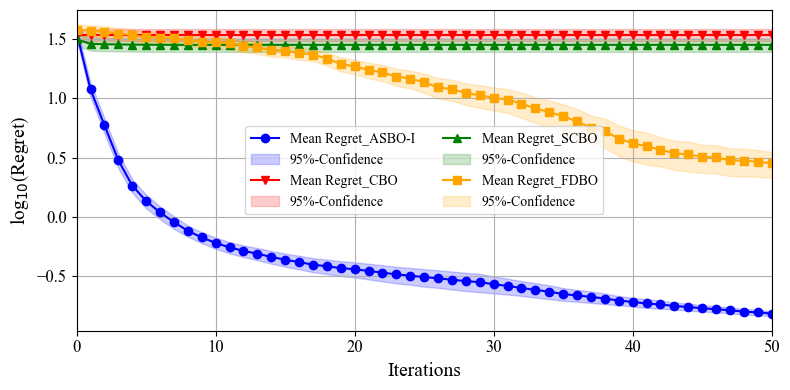

In [9]:
plt.figure(figsize=(8,4))
iterations = range(51)

plt.plot(iterations, regret_mean_ASBO, marker='o', color='b', label='Mean Regret_ASBO-I')
plt.fill_between(iterations, lower_ASBO , upper_ASBO, color='b', alpha=0.2, label='95%-Confidence')

plt.plot(iterations, regret_mean_CBO, marker='v', color='red', label='Mean Regret_CBO')
plt.fill_between(iterations, lower_CBO , upper_CBO, color='red', alpha=0.2, label='95%-Confidence')

plt.plot(iterations, regret_mean_SCBO, marker='^', color='green', label='Mean Regret_SCBO')
plt.fill_between(iterations, lower_SCBO , upper_SCBO, color='green', alpha=0.2, label='95%-Confidence')

plt.plot(iterations, regret_mean_FDBO, marker='s', color='orange', label='Mean Regret_FDBO')
plt.fill_between(iterations, lower_FDBO , upper_FDBO, color='orange', alpha=0.2, label='95%-Confidence')

# plt.yscale('log')
plt.xlabel('Iterations', fontsize=14)
plt.xlim(0,50)
# plt.ylabel(r"$\log_{10}(\mathrm{Regret})$", fontsize=14)
plt.ylabel(r"log$_{10}$(Regret)", fontsize=14)
plt.legend(ncol=2)
plt.grid()
plt.tight_layout()

plt.savefig(DIR/'Regret_Case2.png',dpi=300)
plt.show()


In [10]:
data_dict = {
    'Mean_ASBO': regret_mean_ASBO,
    'Lower_ASBO': lower_ASBO,
    'Upper_ASBO': upper_ASBO,
    'Mean_CBO': regret_mean_CBO,
    'Lower_CBO': lower_CBO,
    'Upper_CBO': upper_CBO,
    'Mean_SCBO': regret_mean_SCBO,
    'Lower_SCBO': lower_SCBO,
    'Upper_SCBO': upper_SCBO,
    'Mean_FDBO': regret_mean_FDBO,
    'Lower_FDBO': lower_FDBO,
    'Upper_FDBO': upper_FDBO,
}

combined_df = pd.concat(data_dict, axis=1)  
combined_df.to_csv(DIR/'Figure2_Case2.csv') 

In [11]:
file_path1 = DIR/'ASBO_Results_Case2_100.csv' 
file_path2 = DIR/'SCBO_Results_Case2_100.csv' 
file_path3 = DIR/'CBO_Results_Case2_100.csv' 
file_path4 = DIR/'GA_Results_Case2_100.csv' 
file_path5 = DIR/'PSO_Results_Case2_100.csv' 
file_path6 = DIR/'slsqp_Results_Case2_100.csv'
file_path7 = DIR/'trust-constr_Results_Case2_100.csv' 

df = pd.read_csv(file_path1)
data_list1 = [-num for num in df['obj']]
df = pd.read_csv(file_path2)
data_list2 = [-num for num in df['obj']]
df = pd.read_csv(file_path3)
data_list3 = [-num for num in df['obj']]
df = pd.read_csv(file_path4)
data_list4 = df['obj'].tolist() 
df = pd.read_csv(file_path5)
data_list5 = df['obj'].tolist() 
df = pd.read_csv(file_path6)
data_list6 = df['obj'].tolist() 
df = pd.read_csv(file_path7)
data_list7 = df['obj'].tolist() 

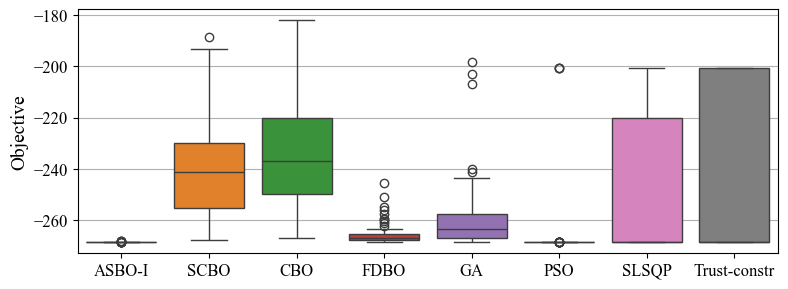

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = [data_list1, data_list2, data_list3, data_list8, data_list4, data_list5, data_list6, data_list7]
labels = ['ASBO-I', 'SCBO', 'CBO', 'FDBO', 'GA', 'PSO', 'SLSQP', 'Trust-constr']

plt.figure(figsize=(8, 3))
sns.boxplot(data=data)
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.ylabel('Objective', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig(DIR/'Box_Case2.png',dpi=300)
plt.show()


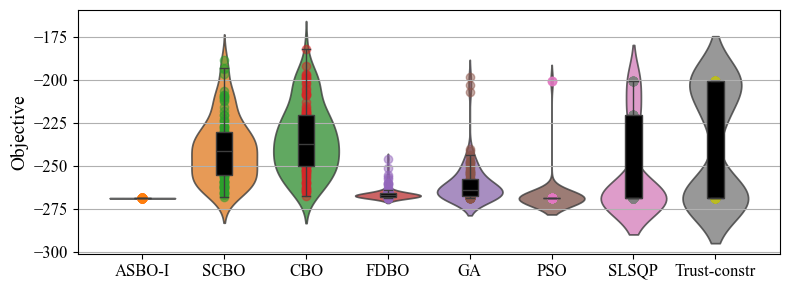

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data = [data_list1, data_list2, data_list3, data_list8, data_list4, data_list5, data_list6, data_list7]

plt.figure(figsize=(8, 3))

sns.violinplot(data=data, inner=None, alpha=0.8)
sns.boxplot(data=data, width=0.2, color='k', fliersize=0)  

for i, algorithm in enumerate(data):
    plt.scatter([i] * len(algorithm), algorithm, alpha=0.5)

plt.xticks(ticks=np.arange(len(data)), labels=['ASBO-I', 'SCBO', 'CBO','FDBO','GA', 'PSO', 'SLSQP', 'Trust-constr'])
plt.ylabel('Objective', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
# plt.savefig(DIR/'Violin_Case2.png',dpi=300)
plt.show()
